In [2]:
import ginsim
import pypint
import biolqm
import maboss

from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from itertools import combinations
from functools import reduce

import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame


This notebook has been executed using the docker image `colomoto/colomoto-docker:2022-07-01`

# Modelo de la tolerización de células dendríticas

Este es el modelo de la torerización de células dendríticas in vitro, realizado a partir de la literatura y de análisis de microarreglos de células dendríticas tolerizadas con IL10 in vitro.

In [3]:
# Load the model and convert it to bioLQM
lrg = ginsim.load("13jul2022.zginml")
lqm = ginsim.to_biolqm(lrg)

ginsim.show(lrg)

## bioLQM analysis

In [4]:
# Define reporter components
reporter_components = ["IL10R", "IL10_gene", "INFsig"]

The model has 2 stable states, which are displayed in a table by the following command line.

In [5]:
# Find fixed points, also called stable states
fpsr = biolqm.fixpoints(lqm, autoconvert=False)

# Generation of a python dataframe containing all stable states, easy tbo filter.
fpsdf = biolqm.states_to_dataframe(fpsr)

fpsdf

,IL10,IL10R,JAK1,Tyk2,STAT3,NFkB,STAT6,TCF7L2,TFCP2L1,IRF8,CEBPB,GAL4,SOCS3,NFkBp50p50,IL1RN,IL1R,Bcl3,INFsig,IL12,IL6,TNF,IL10_gene,C1QA,THBS1,CCR5,CCR7,CXCR4,CCL22,CXCL1,ALDH2,ICOSLG,CTLA4,IL1B,CD80,CD86,HLA_DR,IDO1,HMOX1,ARG1,CCL18,BTLA,PDCD1,ERK,FASLG,CD40
0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1


The stable states can be visualised directly on the network (drawn with GINsim) by using the following command, which is illustrated below for the stable state corresponding to moDC stage (with index 10).

/notebook/tolDCs_il10.png

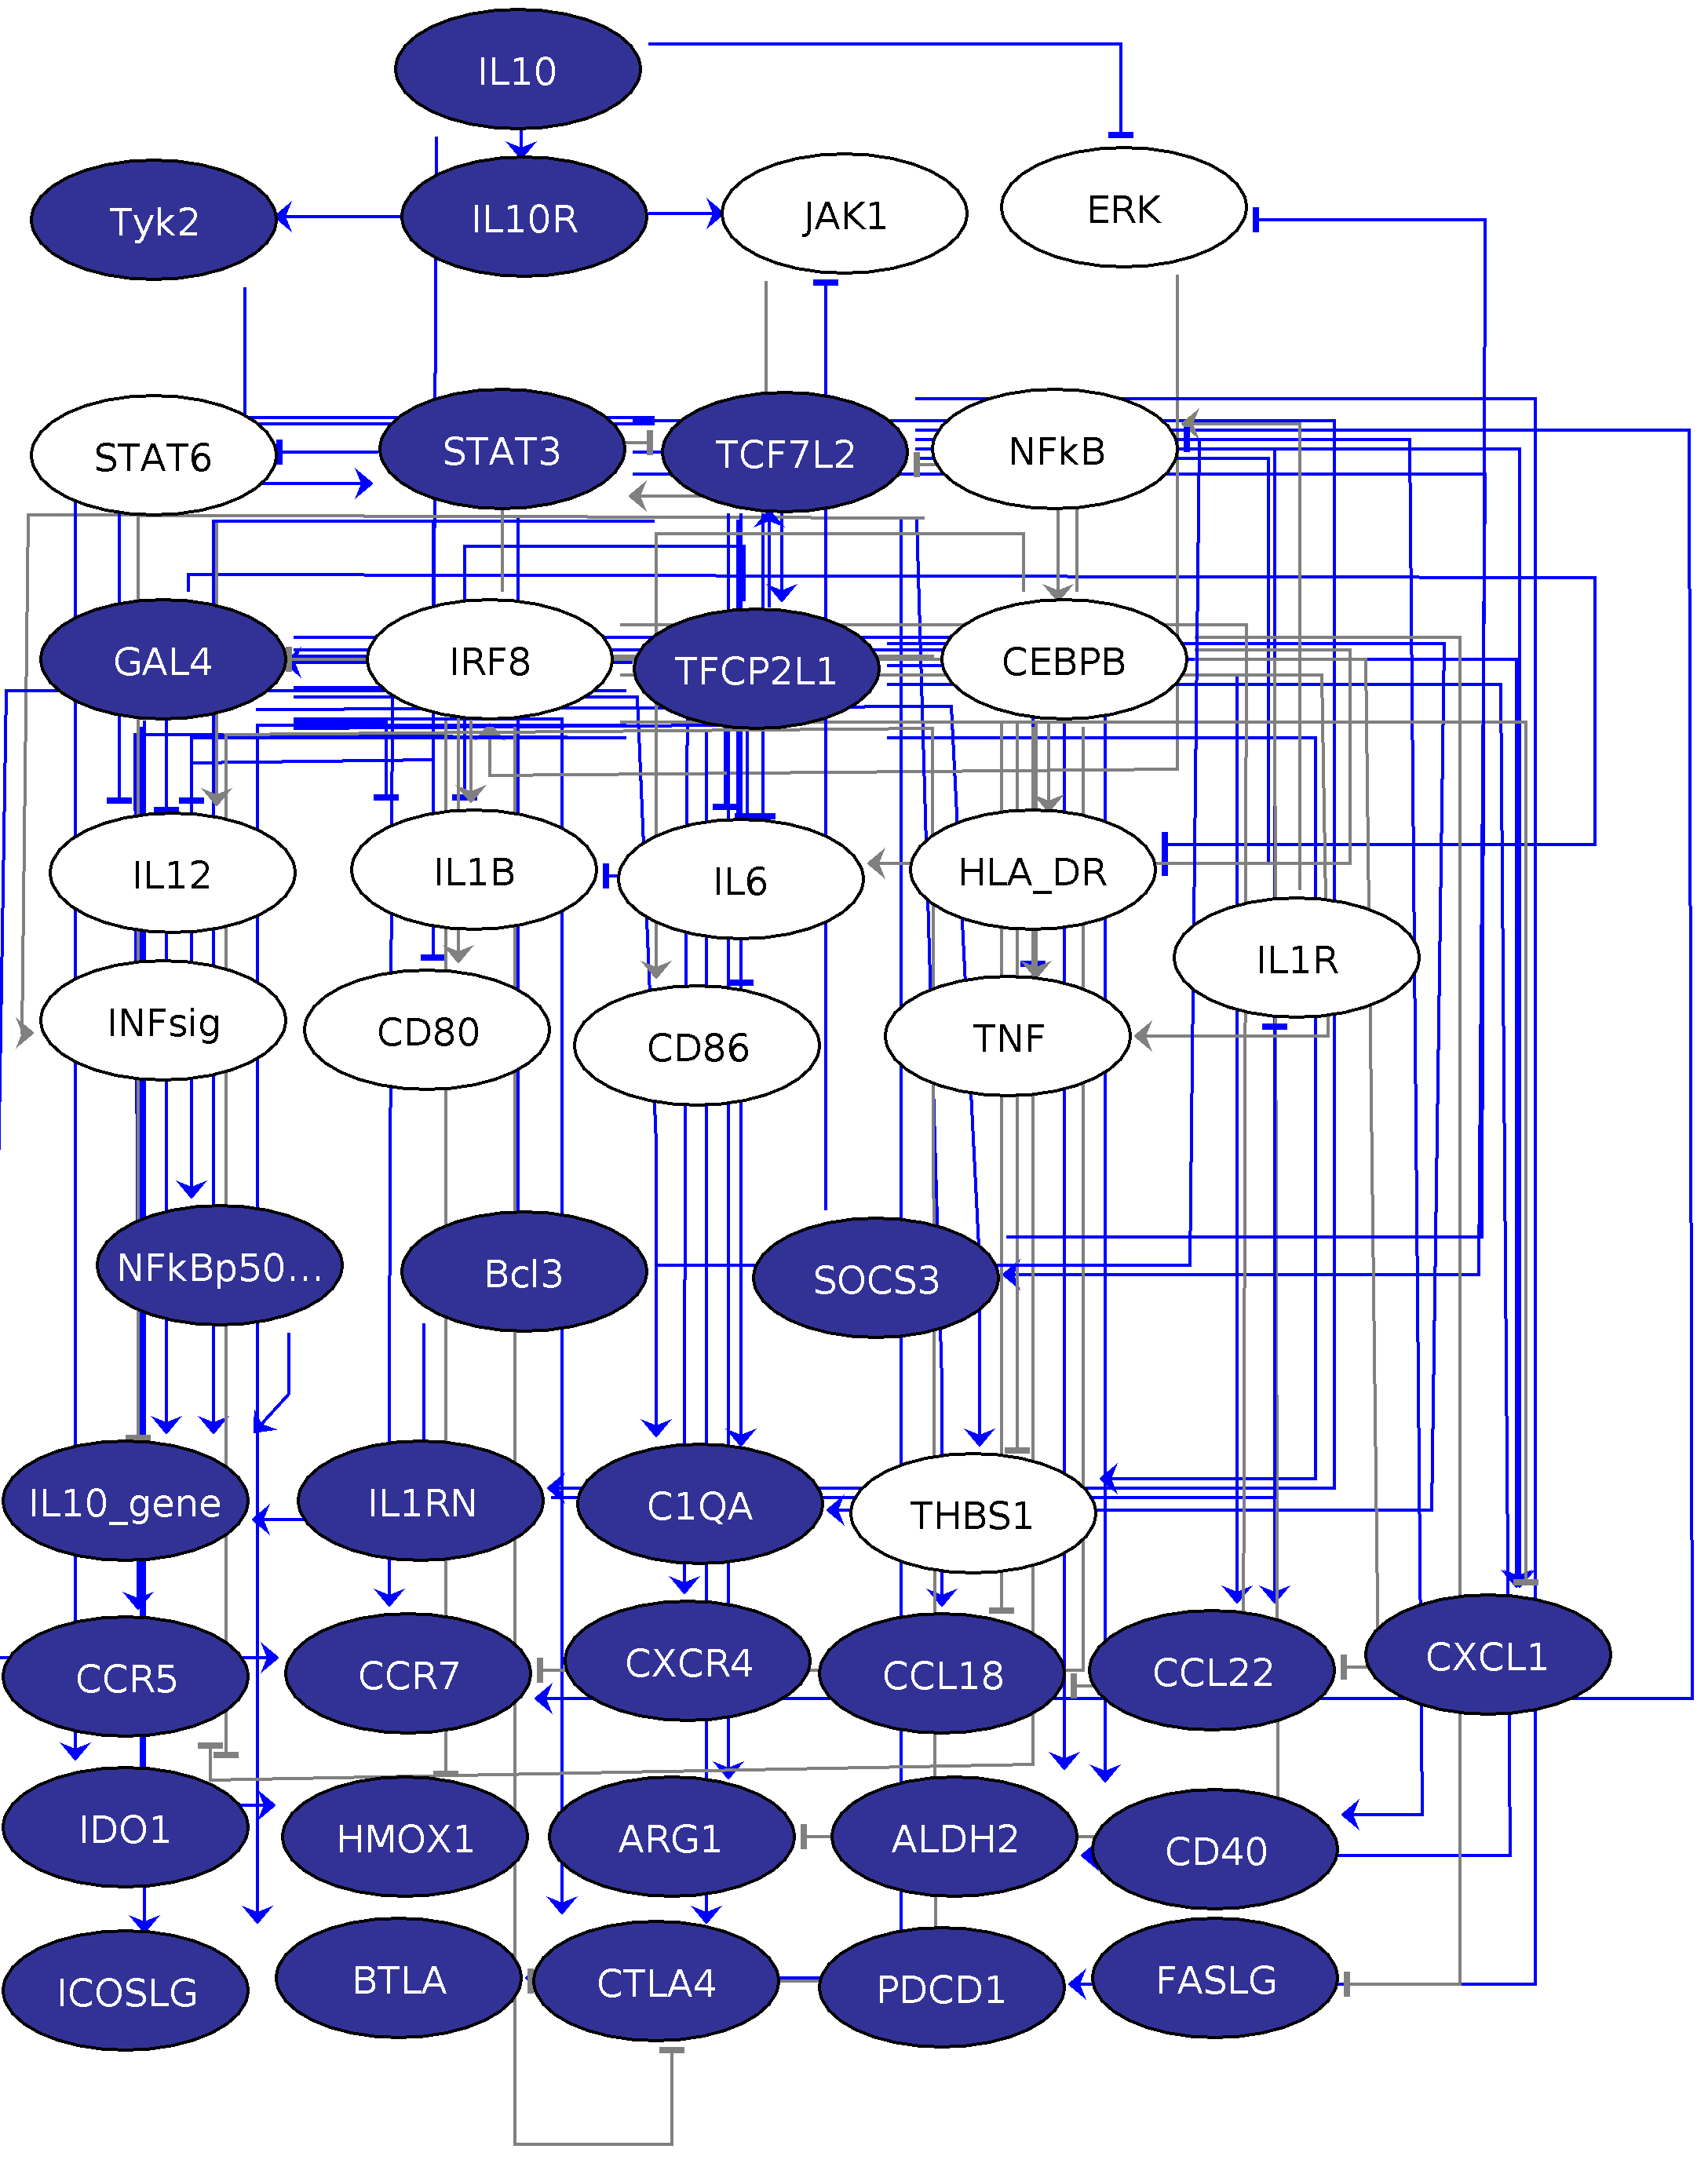

In [6]:
# Displaying the moDC commitment stable state
ginsim.show(lrg,fpsr[1], save="tolDCs_il10.png")

These stable states can be projected onto a more compact set of markers.

In [6]:
# Generation of a table listing all stable states projected on reporter components
fpsdfproj = biolqm.states_to_dataframe( fpsr.project_on_components(reporter_components) )
fpsdfproj

,IL10R,INFsig,IL10_gene
0,0,1,0
1,1,0,1


These stable states correspond to nil, Monocyte, Macrophage and moDC fates, respectively.

## Define mutant versions of the model and compute the corresponding stable state patterns

In [20]:
#List of perturbations to test
perturbations = ["IL10R%0",
                "STAT3%0",
                 "STAT6%0"
                "IRF8%0",
                "CEBPB%0",
                "TCF7L2%0",
                "TFCP2L1%0"]

In [21]:
# Define dictionaries to store attractors for each perturbation
fixpointlist = {}

# Trapspacelist is used to find potential cyclic attractors.
#trapspacelist = {}

for p in perturbations:
    print(p)
    fpsdf = biolqm.fixpoints(biolqm.perturbation(lqm, p))
    if fpsdf:
        fixpointlist[p] = fpsdf
        sys.displayhook(tabulate( fpsdf ))

    else:
        # No stable state found: look for trapspaces
        traps = biolqm.trapspace(biolqm.perturbation(lqm, p))
        sys.displayhook(tabulate( traps ))
    print()

IL10R%0


,IL10,IL10R,JAK1,Tyk2,STAT3,NFkB,STAT6,TCF7L2,TFCP2L1,IRF8,CEBPB,GAL4,SOCS3,NFkBp50p50,IL1RN,IL1R,Bcl3,INFsig,IL12,IL6,TNF,IL10_gene,C1QA,THBS1,CCR5,CCR7,CXCR4,CCL22,CXCL1,ALDH2,ICOSLG,CTLA4,IL1B,CD80,CD86,HLA_DR,IDO1,HMOX1,ARG1,CCL18,BTLA,PDCD1,ERK,FASLG,CD40
0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0



STAT3%0


,IL10,IL10R,JAK1,Tyk2,STAT3,NFkB,STAT6,TCF7L2,TFCP2L1,IRF8,CEBPB,GAL4,SOCS3,NFkBp50p50,IL1RN,IL1R,Bcl3,INFsig,IL12,IL6,TNF,IL10_gene,C1QA,THBS1,CCR5,CCR7,CXCR4,CCL22,CXCL1,ALDH2,ICOSLG,CTLA4,IL1B,CD80,CD86,HLA_DR,IDO1,HMOX1,ARG1,CCL18,BTLA,PDCD1,ERK,FASLG,CD40
0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0
1,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0



STAT6%0IRF8%0


,IL10,IL10R,JAK1,Tyk2,STAT3,NFkB,STAT6,TCF7L2,TFCP2L1,IRF8,CEBPB,GAL4,SOCS3,NFkBp50p50,IL1RN,IL1R,Bcl3,INFsig,IL12,IL6,TNF,IL10_gene,C1QA,THBS1,CCR5,CCR7,CXCR4,CCL22,CXCL1,ALDH2,ICOSLG,CTLA4,IL1B,CD80,CD86,HLA_DR,IDO1,HMOX1,ARG1,CCL18,BTLA,PDCD1,ERK,FASLG,CD40
0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1



CEBPB%0


,IL10,IL10R,JAK1,Tyk2,STAT3,NFkB,STAT6,TCF7L2,TFCP2L1,IRF8,CEBPB,GAL4,SOCS3,NFkBp50p50,IL1RN,IL1R,Bcl3,INFsig,IL12,IL6,TNF,IL10_gene,C1QA,THBS1,CCR5,CCR7,CXCR4,CCL22,CXCL1,ALDH2,ICOSLG,CTLA4,IL1B,CD80,CD86,HLA_DR,IDO1,HMOX1,ARG1,CCL18,BTLA,PDCD1,ERK,FASLG,CD40
0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1



TCF7L2%0


,IL10,IL10R,JAK1,Tyk2,STAT3,NFkB,STAT6,TCF7L2,TFCP2L1,IRF8,CEBPB,GAL4,SOCS3,NFkBp50p50,IL1RN,IL1R,Bcl3,INFsig,IL12,IL6,TNF,IL10_gene,C1QA,THBS1,CCR5,CCR7,CXCR4,CCL22,CXCL1,ALDH2,ICOSLG,CTLA4,IL1B,CD80,CD86,HLA_DR,IDO1,HMOX1,ARG1,CCL18,BTLA,PDCD1,ERK,FASLG,CD40
0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0



TFCP2L1%0


,IL10,IL10R,JAK1,Tyk2,STAT3,NFkB,STAT6,TCF7L2,TFCP2L1,IRF8,CEBPB,GAL4,SOCS3,NFkBp50p50,IL1RN,IL1R,Bcl3,INFsig,IL12,IL6,TNF,IL10_gene,C1QA,THBS1,CCR5,CCR7,CXCR4,CCL22,CXCL1,ALDH2,ICOSLG,CTLA4,IL1B,CD80,CD86,HLA_DR,IDO1,HMOX1,ARG1,CCL18,BTLA,PDCD1,ERK,FASLG,CD40
0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


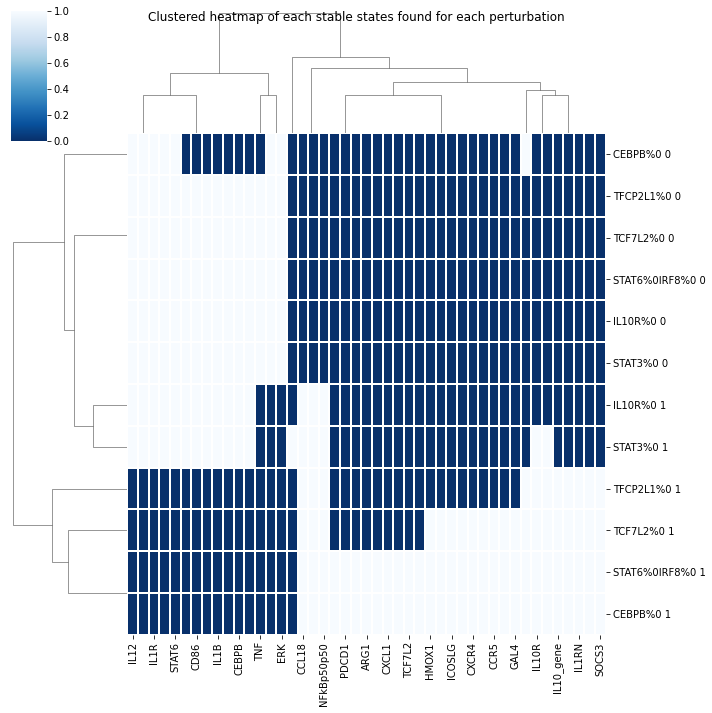

In [24]:
import seaborn as sns

# List of perturbations with the nb of stable states
perturbstates=[]
trappedstates=[]
#List of table state values same order as perturbstates
stablestates = [] 
tstates = [] 

# List of nodes
nodelist = ['IL10','IL10R','JAK1','Tyk2','STAT3','NFkB','STAT6','TCF7L2','TFCP2L1','IRF8','CEBPB','GAL4','SOCS3','NFkBp50p50','IL1RN','IL1R','Bcl3','INFsig','IL12','IL6','TNF','IL10_gene','C1QA','THBS1','CCR5','CCR7','CXCR4','CCL22','CXCL1','ALDH2','ICOSLG','CTLA4','IL1B','CD80','CD86','HLA_DR','IDO1','HMOX1','ARG1','CCL18','BTLA','PDCD1','ERK','FASLG','CD40']

for k,v in fixpointlist.items():   
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            listSS.append(val)
        stablestates.append(listSS)
        perturbstates.append(str(k)+' '+str(i))

# Create dataframe: columns = nodes, rows = perturbations
df = DataFrame(data=stablestates)
df.columns = nodelist
df.index = perturbstates

# Generate clustered heatmap
cm = sns.clustermap(df, metric='euclidean', cmap = 'Blues_r', yticklabels=True, linewidths=0.1)
cm.fig.suptitle('Clustered heatmap of each stable states found for each perturbation')

#Save as figure
plt.savefig('heatmap_mutations24JUN2022.svg')

## Verification of comitment pattern reachability using pint

In [10]:
# Translate the original model into a a discrete automata using bioloqm
lqm = ginsim.to_biolqm(lrg)
an = biolqm.to_pint(lqm)
# an stands for automata network
# Definition of an initial state corresponding to intial monocyte state but in the presence of CSF2 and IL4:
an = an.having(IL10R=0,JAK1=0,Tyk2=1,STAT3=0,IL1RN=0,IL1R=0,NFkB=1,INFsig=0,STAT6=0,NFkBp50p50=1,Bcl3=0,IL12=0,IL10_gene=0, IL10=1)
# Definition of an initial state corresponding to intial monocyte state but in the presence of CSF2 but not IL4:
# an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0, CSF2=1, IL4=0)
# Definition of an initial state corresponding to intial monocyte state but in the presence of IL4 but not CSF2:
#an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0,CSF2=0,IL4=1)
# Definition of a target pattern corresponding to moDC in pint and verify its reachability for the wildtype model
#an.reachability("AhR=1,IRF4=1,CD1A=1,CD209=1")
an.reachability("INFsig=0,IL10_gene=1")

# This may take about a minute on a personal computer...

True

## Stochastic simulations using MaBoSS

In [11]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, ["IL10_gene", "IL12", "INFsig", "IL1RN"])

# Defining ON components at initial state, corresponding to moDC
# Per default, all nodes are set to zero at initial state
# ...
# commands to set the initial state, launch the simulation and display the results  
    mo_ON_Nodes = ('IL10')
    maboss.set_nodes_istate(mbs, mo_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_node_trajectory(until=40)
    simres.plot_entropy_trajectory(until=40)

In [12]:
mb = ginsim.to_maboss(lrg)
#maboss.wg_set_output(mb)
maboss.set_output(mb, ["IL10_gene", "IL1RN", "IL12", "IL1R"])
mb.update_parameters(time_tick=0.5, max_time=25, sample_count=1000)

### Maboss with IL10

In this section is the simulation for the model taking as inputs CSF2 an IL4

In [13]:
mbIL10 = mb.copy()

In [14]:
#maboss.wg_set_istate(mb)
maboss.set_nodes_istate(mbIL10, ["IL10"], [0, 1])

In [15]:
%time resCI = mbIL10.run()

CPU times: user 9.55 ms, sys: 8.75 ms, total: 18.3 ms
Wall time: 474 ms


CPU times: user 202 ms, sys: 54.1 ms, total: 256 ms
Wall time: 271 ms


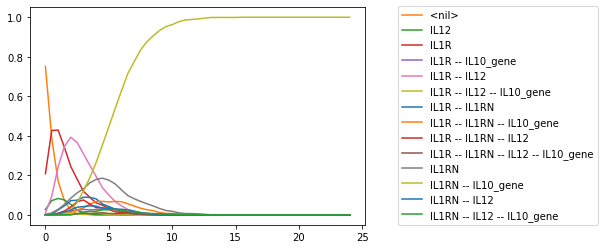

In [16]:
%time resCI.plot_trajectory()
plt.savefig('tolDC_il10.png')

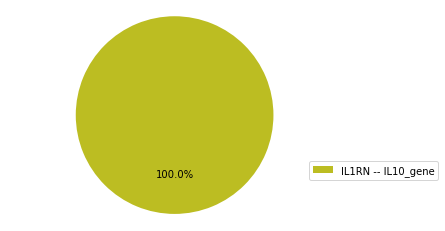

In [17]:
resCI.plot_piechart(autopct=True)
plt.savefig('tolDC_il10_pay.png')

## Conclusiones

Con estos análisis podemos observar que a pesar de tener dos estados finales, una vez que realizamos el análisis con Maboss podemos darnos cuenta que el 100% de la población celular es comprometido a la tolerización.